In [1]:
import requests
import pandas as pd
from scipy.stats import norm
import scipy.stats as stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


pd.set_option("display.max_rows", 200)
pd.set_option("display.max_columns", 50)

In [2]:
url = './FantasyPros_2025_Projections_H.csv'
cats = ["OBP", "HR", "RBI", "SO_rate", "SB"]

In [3]:
df = pd.read_csv(url)
df = df.head(200)
df["SO_rate"] = (df["SO"] / df["AB"]) * -1
print(df.columns)

Index(['Player', 'Team', 'Positions', 'AB', 'R', 'HR', 'RBI', 'SB', 'AVG',
       'OBP', 'H', '2B', '3B', 'BB', 'SO', 'SLG', 'OPS', 'Rost%', 'SO_rate'],
      dtype='object')


In [4]:
def get_primary_pos(x):
    pos = x.split(',')[0]
    if pos == "CF" or pos == "LF" or pos == "RF":
        pos = "OF"
    return pos


def of_eligibility(x):
    for pos in [ 'LF', 'CF', 'RF' ]:
        if pos in x:
            return 1
    else: 
        return 0
    
    
df['primary_position'] = df['Positions'].map(get_primary_pos)

eligibility_list = []
positions = ["SS", "C", "1B", "3B", "2B", "OF", "DH"]
for position in positions:
    colname = f"{position}_eligibility"
    if position == "OF":
        df[colname] = df["Positions"].map(of_eligibility)
        
    else:
        
        df[colname] = df["Positions"].map(lambda x : 1 if position in x.split(",") else 0)
    eligibility_list.append(colname)

In [5]:
def plot_hist(column):
    
    plt.hist(df[column], bins=25, color='blue', edgecolor='black', alpha=0.7)

    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'{column} Histogram')

    plt.show()
def qq_plot(column):

    plt.figure(figsize=(8, 6))
    stats.probplot(df[column], dist="norm", plot=plt)
    plt.title(f'QQ Plot of {column}')
    plt.show()


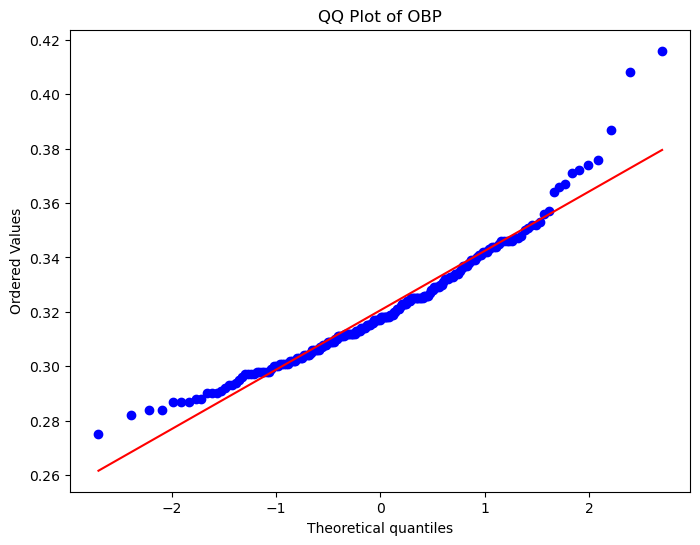

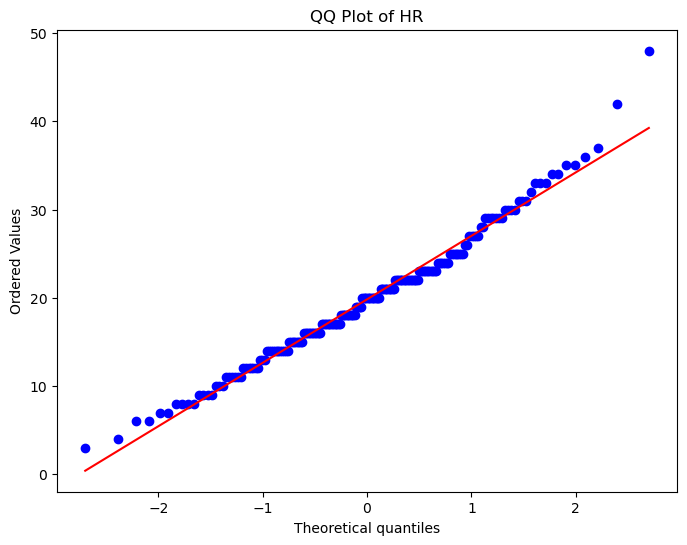

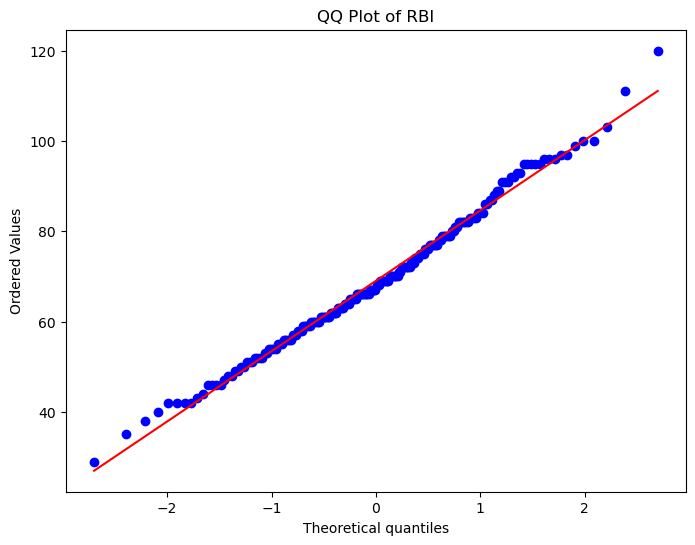

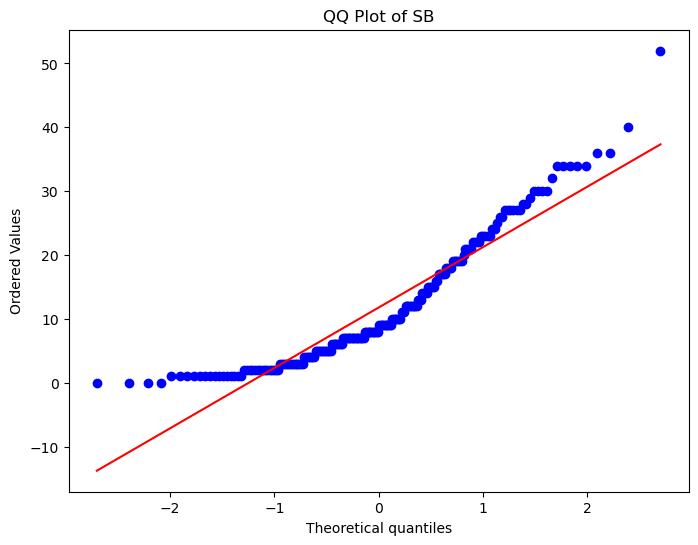

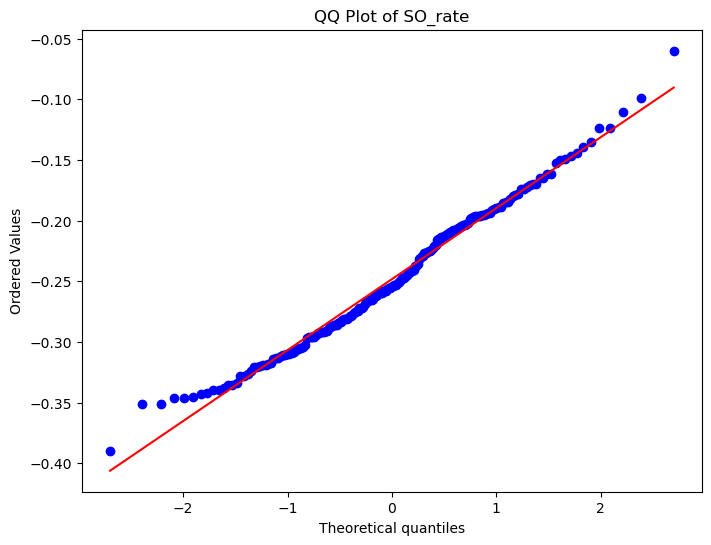

In [6]:
cats=["OBP", "HR", "RBI", "SB", "SO_rate"]
for cat in cats:
    qq_plot(cat)

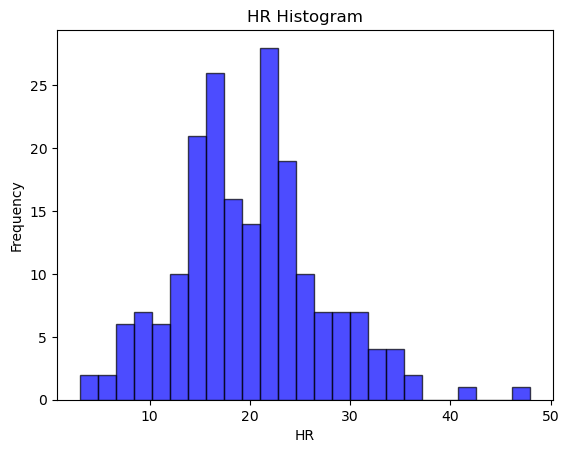

In [7]:
plot_hist("HR")

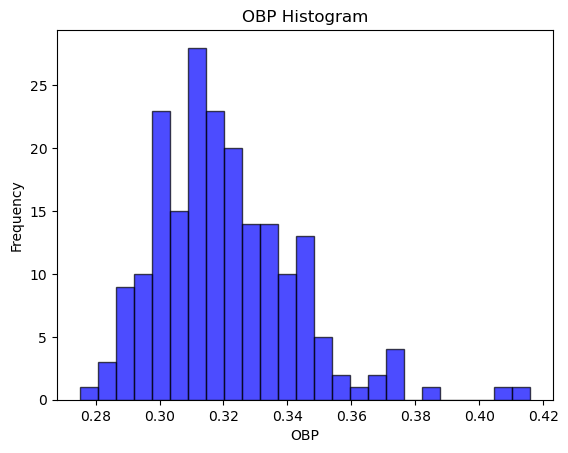

In [8]:
plot_hist("OBP")

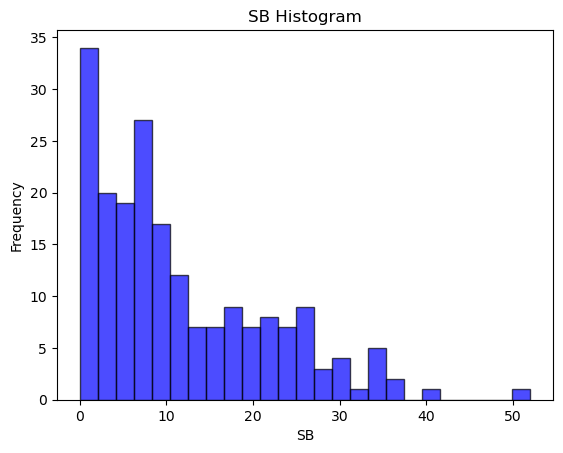

In [9]:
plot_hist("SB")

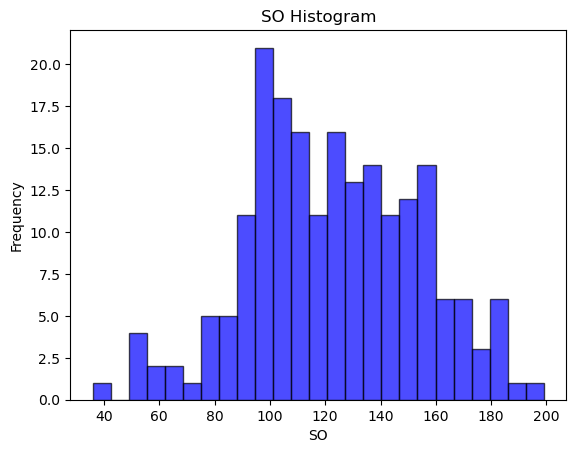

In [10]:
plot_hist("SO")

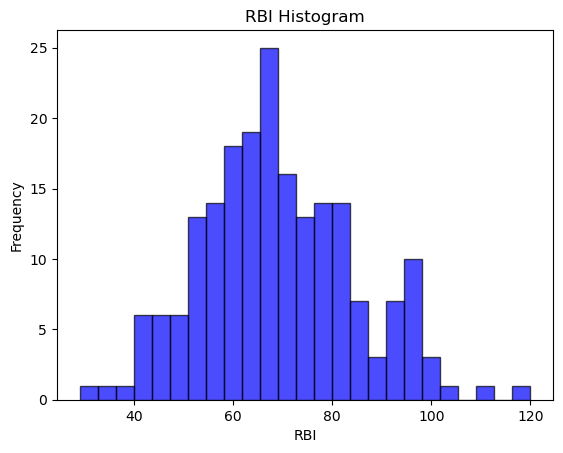

In [11]:
plot_hist("RBI")

In [12]:
data_cats = []
cats = ['OBP', 'HR', 'RBI', 'SO_rate', 'SB']

for cat in cats:
    
    x = df[cat]
    mean = np.mean(x)
    std = np.std(x)
    z_score = (x - mean) / std
    
    data_cat = f"{cat}_zscore"
    df[data_cat] = pd.Series(z_score)
    
    data_cats.append(data_cat)

In [13]:
adp_url = "FantasyPros_2025_Overall_MLB_ADP_Rankings.csv"
df_adp = pd.read_csv(adp_url)
df_adp.rename(columns={"AVG": "adp_avg"}, inplace=True)

df_adp["adp_sd"] = df_adp.apply(lambda x: np.std(x[["Yahoo", "RTS", "NFBC", "FT"]]), axis=1)

df_adp=df_adp.drop(["Rank","Team", "Positions", "Yahoo", "RTS", "NFBC", "FT"],axis=1)

In [14]:
df = df.merge(df_adp, on="Player", how="inner") 

In [15]:
col = 'average_zscore'
df[col] = df[data_cats].mean(axis=1)
data_cats.append(col)

In [16]:
print(data_cats)

['OBP_zscore', 'HR_zscore', 'RBI_zscore', 'SO_rate_zscore', 'SB_zscore', 'average_zscore']


In [17]:
data_cats = ['OBP_zscore', 'HR_zscore', 'RBI_zscore', 'SO_rate_zscore', 'SB_zscore']
col = 'average_zscore'
df[col] = df[data_cats].mean(axis=1)
data_cats.append(col)

In [18]:
df['adp_avg'] = df['adp_avg'].astype(float)
df.sort_values(by='adp_avg')

,Player,Team,Positions,AB,R,HR,RBI,SB,AVG,OBP,H,2B,3B,BB,SO,SLG,OPS,Rost%,SO_rate,primary_position,SS_eligibility,C_eligibility,1B_eligibility,3B_eligibility,2B_eligibility,OF_eligibility,DH_eligibility,OBP_zscore,HR_zscore,RBI_zscore,SO_rate_zscore,SB_zscore,adp_avg,adp_sd,average_zscore
0,Shohei Ohtani,LAD,"DH,SP",565.0,116.0,42.0,111.0,34.0,0.287,0.376,162.0,30.0,5.0,80.0,150.0,0.585,0.961,100%,-0.265487,DH,0,0,0,0,0,0,1,2.495514,3.087184,2.713240,-0.297542,2.245030,1.0,0.000000,2.048685
1,Bobby Witt Jr.,KC,SS,611.0,105.0,30.0,96.0,34.0,0.295,0.347,180.0,36.0,8.0,49.0,110.0,0.532,0.879,100%,-0.180033,SS,1,0,0,0,0,0,0,1.190023,1.416178,1.743648,1.171200,2.245030,2.3,0.433013,1.553216
2,Aaron Judge,NYY,"CF,DH",533.0,108.0,48.0,120.0,8.0,0.285,0.408,152.0,26.0,1.0,111.0,169.0,0.611,1.019,100%,-0.317073,OF,0,0,0,0,0,1,1,3.936055,3.922687,3.294995,-1.184184,-0.380736,3.3,0.433013,1.917763
3,Elly De La Cruz,CIN,SS,589.0,97.0,25.0,82.0,52.0,0.255,0.325,150.0,32.0,8.0,60.0,199.0,0.463,0.787,100%,-0.337861,SS,1,0,0,0,0,0,0,0.199650,0.719925,0.838696,-1.541472,4.062867,4.5,0.866025,0.855933
4,Jose Ramirez,CLE,"3B,DH",591.0,93.0,29.0,95.0,30.0,0.274,0.342,162.0,37.0,3.0,61.0,80.0,0.497,0.838,100%,-0.135364,3B,0,0,0,1,0,0,1,0.964938,1.276927,1.679009,1.938949,1.841066,5.0,0.000000,1.540178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,Kyle Manzardo,CLE,DH,399.0,53.0,17.0,56.0,1.0,0.236,0.317,94.0,24.0,1.0,47.0,101.0,0.432,0.748,3%,-0.253133,DH,0,0,0,0,0,0,1,-0.160485,-0.394079,-0.841928,-0.085209,-1.087673,385.3,24.427188,-0.513875
188,Masataka Yoshida,BOS,DH,346.0,44.0,10.0,46.0,3.0,0.277,0.332,96.0,19.0,1.0,29.0,50.0,0.423,0.756,4%,-0.144509,DH,0,0,0,0,0,0,1,0.514769,-1.368833,-1.488323,1.781771,-0.885691,398.3,22.543014,-0.289261
81,Luis Garcia,WSH,2B,510.0,62.0,16.0,65.0,15.0,0.273,0.314,139.0,26.0,3.0,30.0,87.0,0.427,0.741,49%,-0.170588,2B,0,0,0,0,1,0,0,-0.295536,-0.533329,-0.260174,1.333528,0.326201,412.5,29.500000,0.114138
199,Chas McCormick,HOU,"LF,RF",379.0,50.0,13.0,48.0,12.0,0.237,0.301,90.0,14.0,1.0,34.0,112.0,0.387,0.688,1%,-0.295515,OF,0,0,0,0,0,1,0,-0.880756,-0.951081,-1.359044,-0.813645,0.023228,414.3,57.343022,-0.796260


In [19]:
df['round'] = (df['adp_avg'] // 12 + 1).astype(int)
df['round'] = df["round"].clip(upper=24)

In [20]:
round_by_round = df[['Player', 
                     'average_zscore',
                     'SS_eligibility', 
                     'C_eligibility', 
                     '1B_eligibility',
                     '3B_eligibility',
                     '2B_eligibility',
                     'OF_eligibility',
                     'DH_eligibility',
                     "round"]].melt(id_vars=['Player', 'round', 'average_zscore'], 
                   var_name='position', value_name='is_eligible')

round_by_round = round_by_round[round_by_round['is_eligible'] == 1]

round_by_round = round_by_round.groupby(['round', 'position'])['average_zscore'].mean().reset_index()



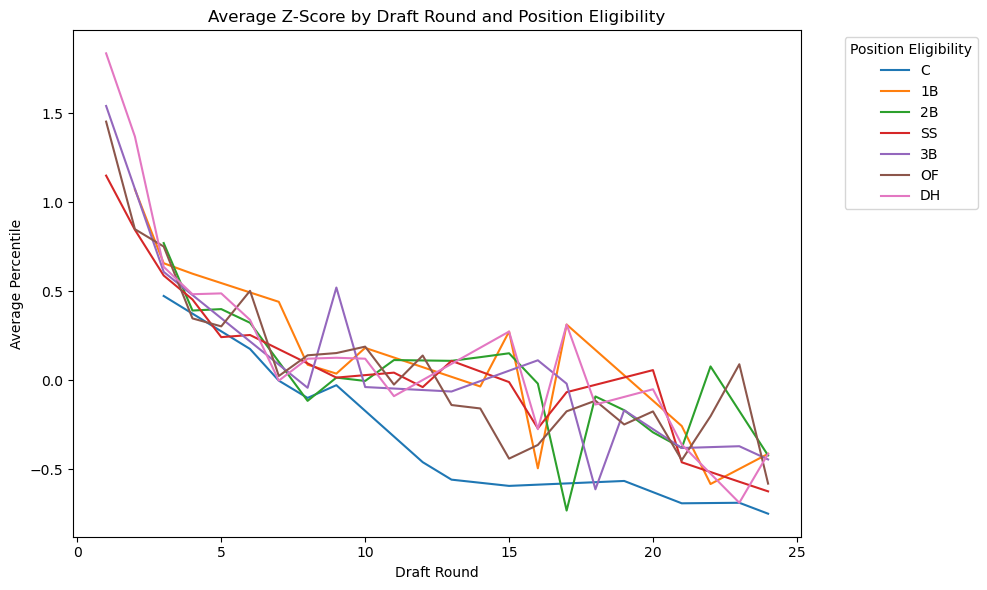

<Figure size 640x480 with 0 Axes>

In [21]:
plt.figure(figsize=(10, 6))

desired_order = [
    'C_eligibility', 
    '1B_eligibility',
    '2B_eligibility',
    'SS_eligibility',
    '3B_eligibility',
    'OF_eligibility',
    'DH_eligibility'
]

sns.lineplot(data=round_by_round, x='round', y='average_zscore', hue='position',hue_order=desired_order)

plt.title('Average Z-Score by Draft Round and Position Eligibility')
plt.xlabel('Draft Round')
plt.ylabel('Average Percentile')
legend = plt.legend(title='Position Eligibility', bbox_to_anchor=(1.05, 1), loc='upper left')
handles, labels = legend.legendHandles, [t.get_text() for t in legend.get_texts()]

new_labels = ['C', '1B', '2B', 'SS', '3B', 'OF', 'DH']

# Update the legend
plt.legend(handles, new_labels, title='Position Eligibility', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

plt.tight_layout()
plt.show()

In [22]:
def get_rel_percent(row):
    position = row["primary_position"] + "_eligibility"
    
    r = round_by_round[(round_by_round["round"] == row["round"]) &
                       (round_by_round["position"] == position)]["average_zscore"]
 
    ans = 0
    
    try:
        ans = (row["average_zscore"] - r).iloc[0]
        return ans
    except:
        return None
        
        
    
    
df['relative_zscore'] = df.apply(get_rel_percent,axis=1)




In [23]:
pd.set_option("display.max_rows", None)  # Show all rows
pd.set_option("display.max_columns", None)  # Show all columns
pd.set_option("display.width", 1000)  # Prevent line breaks
df = df.sort_values(by='relative_zscore', ascending=False)
df["rp_rank"] = df["relative_zscore"].rank(method="dense", ascending=False).astype(int)
df["p_rank"] = df["average_zscore"].rank(method="dense", ascending=False).astype(int)


In [24]:
from IPython.display import display

display_cats = ["rp_rank", "p_rank", "Player", "Positions","OBP_zscore",
                "HR_zscore",
                "RBI_zscore",
                "SO_rate_zscore",
                "SB_zscore", "relative_zscore","adp_avg"]


display(df[display_cats])

,rp_rank,p_rank,Player,Positions,OBP_zscore,HR_zscore,RBI_zscore,SO_rate_zscore,SB_zscore,relative_zscore,adp_avg
13,1,7,Yordan Alvarez,"LF,DH",2.990700,2.112430,1.937567,0.894760,-0.885691,0.561413,16.8
155,2,93,Lars Nootbaar,"LF,CF,RF",1.145006,-0.394079,-0.777289,0.182509,-0.279745,0.554642,294.3
81,3,69,Luis Garcia,2B,-0.295536,-0.533329,-0.260174,1.333528,0.326201,0.535592,412.5
140,4,128,Gabriel Moreno,C,1.145006,-1.508083,-1.100486,1.087289,-0.683709,0.477821,240.5
145,5,114,JJ Bleday,CF,-0.160485,0.162923,0.063023,0.078813,-0.683709,0.471475,280.3
2,6,2,Aaron Judge,"CF,DH",3.936055,3.922687,3.294995,-1.184184,-0.380736,0.465371,3.3
193,7,140,Alejandro Kirk,C,0.694836,-1.508083,-1.423683,1.869401,-1.188664,0.436947,317.0
25,8,10,Ronald Acuna Jr.,RF,2.405480,0.441424,-0.001616,0.603828,2.447012,0.427807,28.0
103,9,76,Taylor Ward,LF,0.199650,0.441424,0.450860,-0.283223,-0.481727,0.427736,183.5
1,10,4,Bobby Witt Jr.,SS,1.190023,1.416178,1.743648,1.171200,2.245030,0.403927,2.3


In [28]:
from IPython.display import display

display_cats = ["adp_avg","rp_rank", "p_rank", "Player", "Positions","OBP_zscore",
                "HR_zscore",
                "RBI_zscore",
                "SO_rate_zscore",
                "SB_zscore", "average_zscore", "relative_zscore",]



display(df.sort_values(by='p_rank', ascending=True)[display_cats])



,adp_avg,rp_rank,p_rank,Player,Positions,OBP_zscore,HR_zscore,RBI_zscore,SO_rate_zscore,SB_zscore,average_zscore,relative_zscore
0,1.0,29,1,Shohei Ohtani,"DH,SP",2.495514,3.087184,2.713240,-0.297542,2.245030,2.048685,0.213143
2,3.3,6,2,Aaron Judge,"CF,DH",3.936055,3.922687,3.294995,-1.184184,-0.380736,1.917763,0.465371
5,7.0,25,3,Juan Soto,RF,4.296191,1.973180,1.743648,0.674095,-0.279745,1.681474,0.229081
1,2.3,10,4,Bobby Witt Jr.,SS,1.190023,1.416178,1.743648,1.171200,2.245030,1.553216,0.403927
4,5.0,84,5,Jose Ramirez,"3B,DH",0.964938,1.276927,1.679009,1.938949,1.841066,1.540178,0.000000
6,8.5,92,6,Kyle Tucker,RF,2.045344,1.276927,1.549730,1.199635,1.033138,1.420955,-0.031437
13,16.8,1,7,Yordan Alvarez,"LF,DH",2.990700,2.112430,1.937567,0.894760,-0.885691,1.409953,0.561413
12,14.0,19,8,Vladimir Guerrero Jr.,"1B,DH",2.270429,1.555428,2.002206,1.493336,-0.683709,1.327538,0.255512
8,9.0,58,9,Mookie Betts,"SS,RF",1.955310,0.998426,1.420451,1.491391,0.326201,1.238356,0.089067
25,28.0,8,10,Ronald Acuna Jr.,RF,2.405480,0.441424,-0.001616,0.603828,2.447012,1.179225,0.427807


In [29]:
# Jack of all trades, master of None
# Our Model does not like Aaron Judge because he strikes out a lot and has a below average OBP
# Let's make a model to favor the more top heavy players
# ideas for value metrics
# take the average of their top 3 or 4 categories
# take the top category z score - bottom category z score


In [27]:
data_cats = ['OBP_percentile', 'HR_percentile', 'RBI_percentile', 'SO_percentile', 'SB_percentile']
for cat in cats:
    
    x = df[cat]
    mean = np.mean(x)
    std = np.std(x)
    z_score = (x - mean) / std
    percentile = norm.cdf(z_score)
    
    data_cat = f"{cat}_percentile"
    df[data_cat] = pd.Series(percentile)
    
    data_cats.append(data_cat)